<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


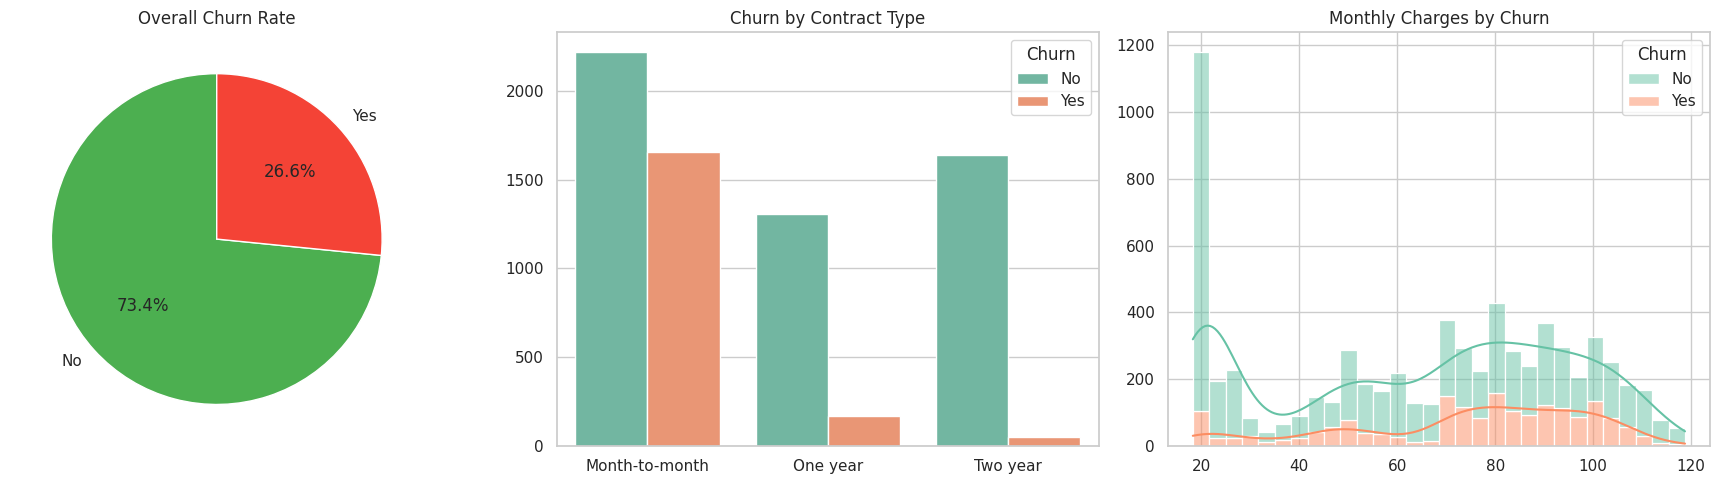

In [13]:
import pandas as pd

# Load from uploaded file
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Preview the dataset
df.head()
# Quick summary of the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Convert 'TotalCharges' to a number (some entries may be blank)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for rows where conversion failed (now NaN)
df[df['TotalCharges'].isnull()]

# Drop the rows with missing TotalCharges
df = df.dropna(subset=['TotalCharges'])

# Convert the column to float now that it's clean
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Double-check the conversion worked
df.dtypes

import matplotlib.pyplot as plt

# Count churn values
churn_counts = df['Churn'].value_counts()

import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")


# Set up layout
plt.figure(figsize=(18,5))

# Pie chart - overall churn rate
plt.subplot(1, 3, 1)
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336'])
plt.title('Overall Churn Rate')

# Bar chart - churn by contract
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2')
plt.title('Churn by Contract Type')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Churn')

# Histogram - monthly charges
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30, kde=True, palette='Set2', multiple='stack')
plt.title('Monthly Charges by Churn')
plt.xlabel('')
plt.ylabel('')

plt.tight_layout()
plt.show()







